In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle
import warnings

In [ ]:
warnings.filterwarnings('ignore')

Heart Failure Prediction Model Training
Dataset loaded successfully!
Dataset shape: (299, 13)

First few rows:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116   

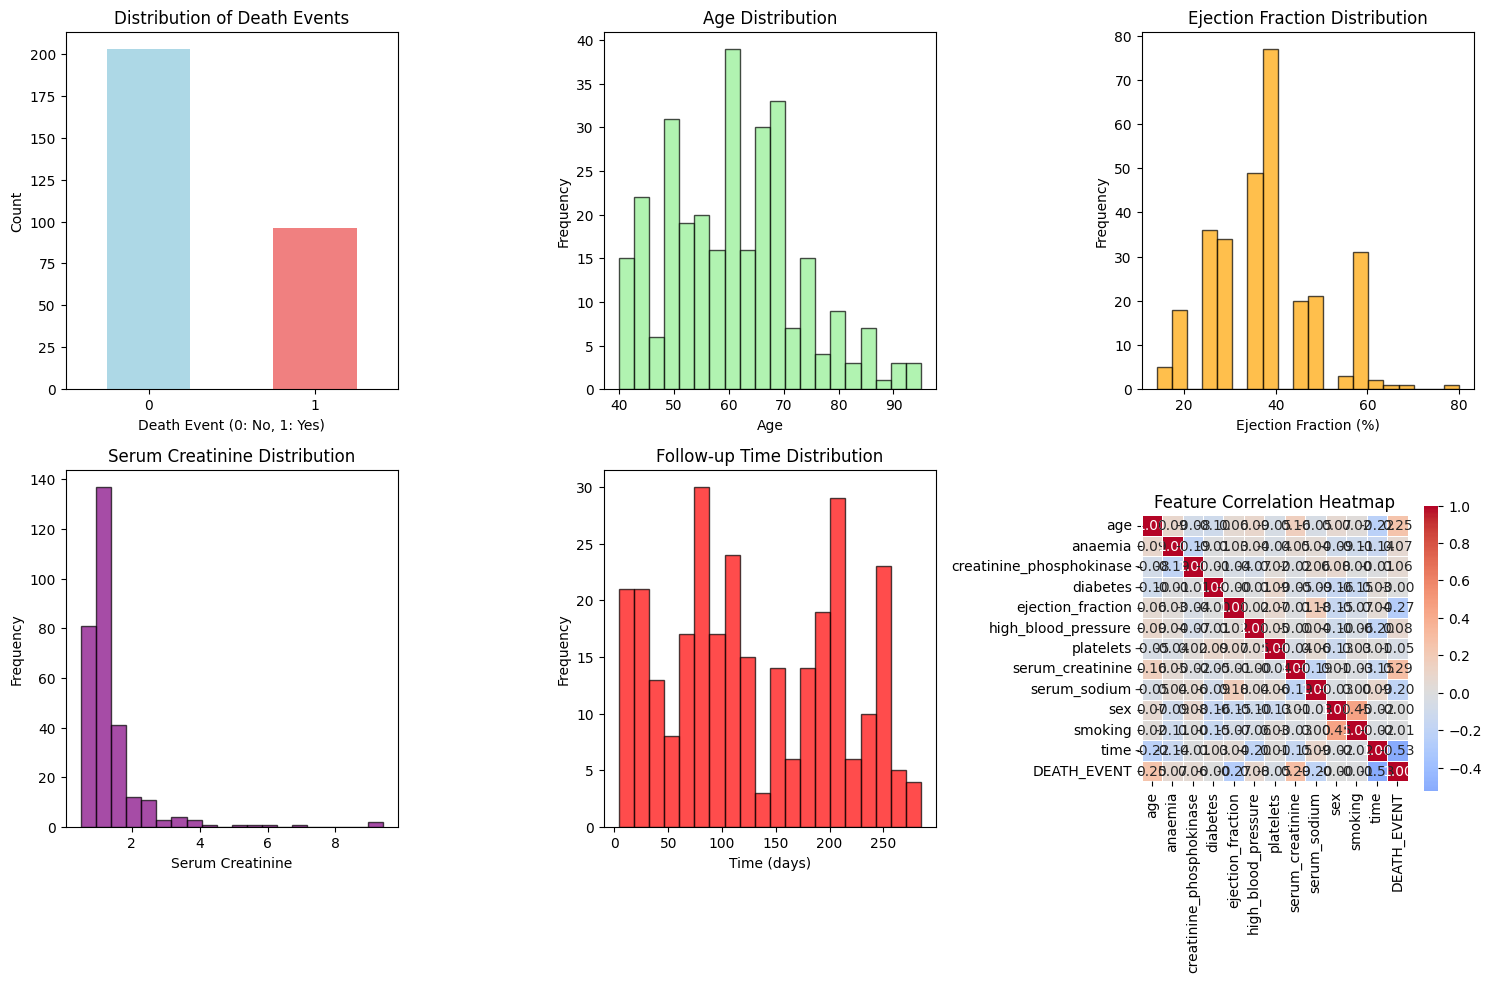

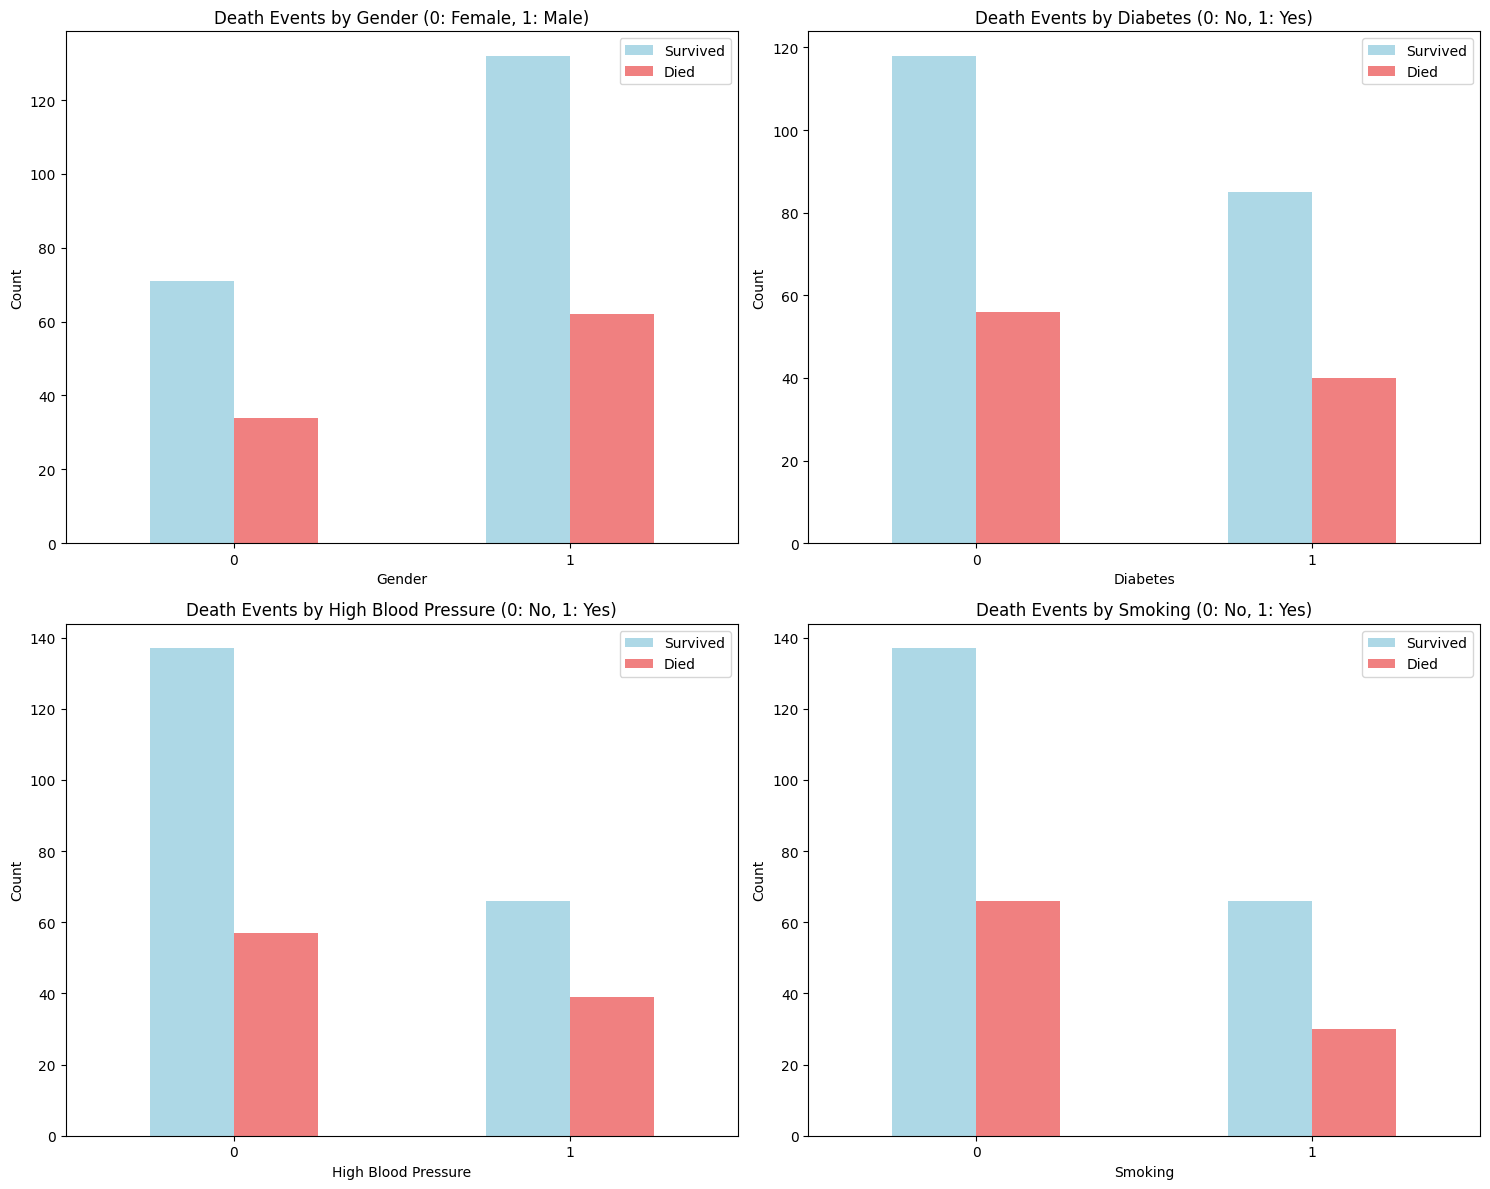


FEATURE IMPORTANCE ANALYSIS
Training set size: (239, 12)
Test set size: (60, 12)
Target distribution in training set: {0: 162, 1: 77}

MODEL TRAINING AND EVALUATION

Training Random Forest...
Test Accuracy: 0.8333
AUC Score: 0.8915
CV Accuracy: 0.8493 (+/- 0.0896)

Training Gradient Boosting...
Test Accuracy: 0.8333
AUC Score: 0.8447
CV Accuracy: 0.8495 (+/- 0.0884)

Training SVM...
Test Accuracy: 0.7667
AUC Score: 0.8447
CV Accuracy: 0.8075 (+/- 0.1130)

Training Logistic Regression...
Test Accuracy: 0.8167
AUC Score: 0.8588
CV Accuracy: 0.8367 (+/- 0.0860)

MODEL COMPARISON RESULTS
                     accuracy auc_score   cv_mean    cv_std
Random Forest        0.833333  0.891528  0.849291  0.044775
Gradient Boosting    0.833333  0.844673  0.849468  0.044201
SVM                  0.766667  0.844673  0.807535  0.056483
Logistic Regression  0.816667  0.858793  0.836702  0.042988

Best Model: Random Forest with accuracy: 0.8333

HYPERPARAMETER TUNING FOR RANDOM FOREST
Fitting 5 folds fo

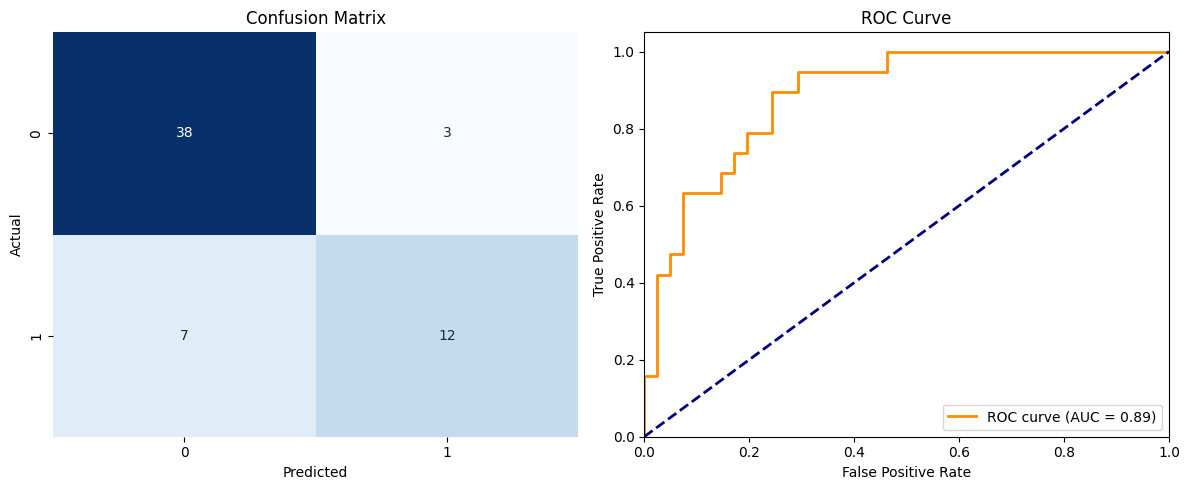


Feature Importance:
                     feature  importance
11                      time    0.399564
7           serum_creatinine    0.151432
4          ejection_fraction    0.134737
0                        age    0.076652
6                  platelets    0.067358
2   creatinine_phosphokinase    0.063963
8               serum_sodium    0.051051
3                   diabetes    0.012042
5        high_blood_pressure    0.011438
9                        sex    0.011238
10                   smoking    0.010524
1                    anaemia    0.010001


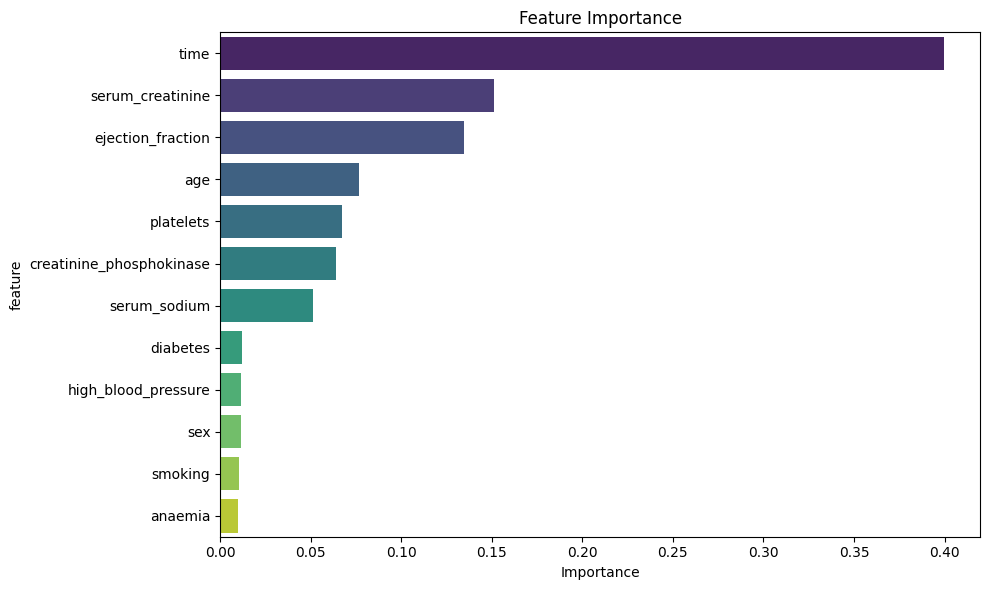


SAVING MODEL AND PREPROCESSING OBJECTS
Model and preprocessing objects saved successfully!
Final model accuracy: 0.8333
Model saved as: heart_failure_model.pkl

TESTING SAVED MODEL
Model loaded successfully!
Loaded model info: {'model_name': 'Random Forest', 'best_params': {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}, 'accuracy': 0.8333333333333334, 'auc_score': np.float64(0.8870346598202825), 'feature_names': ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'], 'uses_scaling': False}

Sample patient data:
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
274  60.0        1                       257         1                 30   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
274                    0   150000.0               1.0           137    1   

     smoki

In [ ]:
plt.style.use('default')
sns.set_palette("husl")

print("Heart Failure Prediction Model Training")
print("=" * 50)

df = pd.read_csv('heart_failure_clinical_records_dataset (1).csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['DEATH_EVENT'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribution of Death Events')
plt.xlabel('Death Event (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(2, 3, 2)
plt.hist(df['age'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['ejection_fraction'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Ejection Fraction Distribution')
plt.xlabel('Ejection Fraction (%)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df['serum_creatinine'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Serum Creatinine Distribution')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(df['time'], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Follow-up Time Distribution')
plt.xlabel('Time (days)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

df.groupby(['sex', 'DEATH_EVENT']).size().unstack().plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightcoral'])
axes[0,0].set_title('Death Events by Gender (0: Female, 1: Male)')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(['Survived', 'Died'])
axes[0,0].tick_params(axis='x', rotation=0)

df.groupby(['diabetes', 'DEATH_EVENT']).size().unstack().plot(kind='bar', ax=axes[0,1], color=['lightblue', 'lightcoral'])
axes[0,1].set_title('Death Events by Diabetes (0: No, 1: Yes)')
axes[0,1].set_xlabel('Diabetes')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(['Survived', 'Died'])
axes[0,1].tick_params(axis='x', rotation=0)

df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size().unstack().plot(kind='bar', ax=axes[1,0], color=['lightblue', 'lightcoral'])
axes[1,0].set_title('Death Events by High Blood Pressure (0: No, 1: Yes)')
axes[1,0].set_xlabel('High Blood Pressure')
axes[1,0].set_ylabel('Count')
axes[1,0].legend(['Survived', 'Died'])
axes[1,0].tick_params(axis='x', rotation=0)

df.groupby(['smoking', 'DEATH_EVENT']).size().unstack().plot(kind='bar', ax=axes[1,1], color=['lightblue', 'lightcoral'])
axes[1,1].set_title('Death Events by Smoking (0: No, 1: Yes)')
axes[1,1].set_xlabel('Smoking')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(['Survived', 'Died'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Target distribution in training set: {y_train.value_counts().to_dict()}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION")
print("="*50)

model_results = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\nTraining {name}...")

    if name == 'SVM' or name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    if name == 'SVM' or name == 'Logistic Regression':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    model_results[name] = {
        'accuracy': accuracy,
        'auc_score': auc_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'model': model
    }

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print("\n" + "="*50)
print("MODEL COMPARISON RESULTS")
print("="*50)

results_df = pd.DataFrame(model_results).T
results_df = results_df[['accuracy', 'auc_score', 'cv_mean', 'cv_std']]
results_df = results_df.round(4)
print(results_df)

print(f"\nBest Model: {best_model_name} with accuracy: {best_accuracy:.4f}")

print(f"\n" + "="*50)
print(f"HYPERPARAMETER TUNING FOR {best_model_name.upper()}")
print("="*50)

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

else:
    if best_model_name == 'SVM':
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01],
            'kernel': ['rbf', 'linear']
        }
    else:
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['liblinear', 'lbfgs']
        }

    grid_search = GridSearchCV(
        best_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    if best_model_name == 'SVM' or best_model_name == 'Logistic Regression':
        grid_search.fit(X_train_scaled, y_train)
    else:
        grid_search.fit(X_train, y_train)

tuned_model = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

if best_model_name == 'SVM' or best_model_name == 'Logistic Regression':
    y_pred_tuned = tuned_model.predict(X_test_scaled)
    y_pred_proba_tuned = tuned_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_tuned = tuned_model.predict(X_test)
    y_pred_proba_tuned = tuned_model.predict_proba(X_test)[:, 1]

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_auc = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"\nTuned Model Performance:")
print(f"Test Accuracy: {tuned_accuracy:.4f}")
print(f"AUC Score: {tuned_auc:.4f}")

print("\n" + "="*50)
print("FINAL MODEL EVALUATION")
print("="*50)

print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_tuned)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {tuned_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': tuned_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

print("\n" + "="*50)
print("SAVING MODEL AND PREPROCESSING OBJECTS")
print("="*50)

with open('heart_failure_model.pkl', 'wb') as f:
    pickle.dump(tuned_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

model_info = {
    'model_name': best_model_name,
    'best_params': grid_search.best_params_,
    'accuracy': tuned_accuracy,
    'auc_score': tuned_auc,
    'feature_names': list(X.columns),
    'uses_scaling': best_model_name in ['SVM', 'Logistic Regression']
}

with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("Model and preprocessing objects saved successfully!")
print(f"Final model accuracy: {tuned_accuracy:.4f}")
print(f"Model saved as: heart_failure_model.pkl")

print("\n" + "="*50)
print("TESTING SAVED MODEL")
print("="*50)

with open('heart_failure_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

with open('model_info.pkl', 'rb') as f:
    loaded_info = pickle.load(f)

print("Model loaded successfully!")
print(f"Loaded model info: {loaded_info}")

sample_data = X_test.iloc[0:1]
print(f"\nSample patient data:")
print(sample_data)

if loaded_info['uses_scaling']:
    sample_scaled = loaded_scaler.transform(sample_data)
    prediction = loaded_model.predict(sample_scaled)[0]
    probability = loaded_model.predict_proba(sample_scaled)[0]
else:
    prediction = loaded_model.predict(sample_data)[0]
    probability = loaded_model.predict_proba(sample_data)[0]

print(f"\nPrediction: {'Death Event' if prediction == 1 else 'No Death Event'}")
print(f"Probability: {probability}")
print(f"Actual: {'Death Event' if y_test.iloc[0] == 1 else 'No Death Event'}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model: {best_model_name}")
print(f"Accuracy: {tuned_accuracy:.4f} ({tuned_accuracy*100:.2f}%)")
print(f"AUC Score: {tuned_auc:.4f}")
print("\nFiles saved:")
print("- heart_failure_model.pkl")
print("- scaler.pkl")
print("- feature_names.pkl")
print("- model_info.pkl")